In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns

In [2]:
#df = pd.read_csv("data/testdata_000000000001.csv", index_col="clusterid")


# col_names = {
#     "out_degree": "OTD",
#     "in_degree": "IND",
#     "total_degree": "TLD",
#     "active_days": "ACT",
#     "degree_per_active_day": "DACT",
#     "total_amount_received": "TAR",
#     "avg_amount_received": "AAR",
#     "total_amount_sent": "TAS",
#     "avg_amount_sent": "AAS",
# }


# col_dtypes = {
#     "out_degree":np. uint32,
#     "in_degree": np. uint32,
#     "total_degree": np. uint32,
#     "active_days": np. uint32,
#     "degree_per_active_day": np. ufloat32,
#     "total_amount_received": np. uint32,
#     "avg_amount_received": np. ufloat32,
#     "total_amount_sent": np. uint32,
#     "avg_amount_sent": np. ufloat32,
# }

print("\n Loading data")
df = pd.concat([pd.read_csv(f,index_col="clusterid") for f in glob.glob('../export/wuexport/export/testdata_*.csv')])
#df.rename(columns = col_names, inplace= True)
print("\n End loading data")



 Loading data

 End loading data


In [3]:
df.drop(columns=["first_activity"], axis=1,inplace=True)

In [4]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256138652 entries, 10127818 to 30408088
Data columns (total 12 columns):
 #   Column                 Non-Null Count      Dtype  
---  ------                 --------------      -----  
 0   out_degree             256138652 non-null  int64  
 1   in_degree              256138652 non-null  int64  
 2   total_degree           256138652 non-null  int64  
 3   active_days            256138652 non-null  int64  
 4   degree_per_active_day  256138652 non-null  float64
 5   total_amount_received  256138652 non-null  int64  
 6   avg_amount_received    256138652 non-null  float64
 7   total_amount_sent      256138652 non-null  int64  
 8   avg_amount_sent        256138652 non-null  float64
 9   avg_active_hour_utc    256138652 non-null  float64
 10  final_balance          256138652 non-null  int64  
 11  avg_utxo_age           256138652 non-null  float64
dtypes: float64(5), int64(7)
memory usage: 24.8 GB


In [5]:
df.head()

,out_degree,in_degree,total_degree,active_days,degree_per_active_day,total_amount_received,avg_amount_received,total_amount_sent,avg_amount_sent,avg_active_hour_utc,final_balance,avg_utxo_age
clusterid,,,,,,,,,,,,
10127818,101,125,226,1362,0.091777,227049542,2.248015e+06,218711470,1.749692e+06,13.696000,5699417,172.000000
7219,984597,1114334,2098931,1435,776.539373,4449639103884,4.519249e+06,4417966164890,3.964670e+06,11.973782,3023,148.333333
10311192,26,11,37,32,0.343750,29625190,1.139430e+06,29597685,2.690699e+06,10.909091,0,0.000000
25333163,19,2,21,5,0.400000,163167542,8.587765e+06,163162935,8.158147e+07,7.500000,0,0.000000
90929,104865,114154,219019,2937,38.867552,1475715936756,1.407253e+07,1472871174439,1.290249e+07,11.591079,1133500,2468.000000


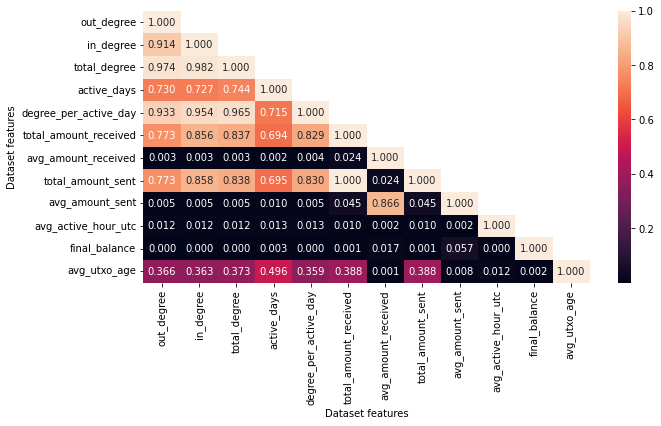

In [6]:
corr = df.corr().abs()

fig, ax = plt.subplots(figsize=(10,5))  

hm = sns.heatmap(corr, annot = True, fmt="0.3f",  mask = ~np.tril(np.ones(corr.shape)).astype(bool), ax=ax)

hm.set(xlabel='Dataset features', ylabel='Dataset features') #title = "Correlation matrix of Bitcoin 2009-2022 features\n")

#plt.yticks(rotation=45) 
#plt.xticks(rotation=45) 

plt.savefig("heatmap.pdf",bbox_inches='tight')
plt.show()

In [7]:
df.drop(columns=["total_degree"], axis=1,inplace=True)

In [8]:
from sklearn.preprocessing import RobustScaler

df[df.columns] = RobustScaler().fit_transform(df[df.columns])

df.head()


,out_degree,in_degree,active_days,degree_per_active_day,total_amount_received,avg_amount_received,total_amount_sent,avg_amount_sent,avg_active_hour_utc,final_balance,avg_utxo_age
clusterid,,,,,,,,,,,
10127818,100.0,123.0,1361.0,-1.908223,7.104369,-0.019457,6.804139,-0.008882,0.063273,5699417.0,172.000000
7219,984596.0,1114332.0,1434.0,774.539373,141570.762249,0.083054,139846.689978,0.159005,-0.093293,3023.0,148.333333
10311192,25.0,9.0,31.0,-1.656250,0.823064,-0.069492,0.817909,0.062443,-0.190083,0.0,0.000000
25333163,18.0,0.0,4.0,-1.600000,5.071883,0.266683,5.045799,6.042048,-0.500000,0.0,0.000000
90929,104864.0,114152.0,2936.0,36.867552,46951.644790,0.514234,46622.314526,0.836456,-0.128084,1133500.0,2468.000000


In [ ]:
print("\n Saving Results")

df.to_csv("new_data/preprocessing_data_scaler.csv")

print("\n Results save")



 Saving Results
